<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/digital_screeni/machine_learning/KMeans_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drlee.io/efficient-customer-segmentation-in-retail-using-kmeans-clustering-025c3961bd52

ecom_data.csv
https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab images/ecom_data.csv', encoding='ISO-8859-1')

#encoding='ISO-8859-1'

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Convert InvoiceDate from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate total spend for each transaction
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

rename() columns in dictonary style
groupby('CustomerID')
aggregate({

})
lambda function in days of date

In [ ]:
# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})

In [ ]:
customer_data

,Recency,Frequency,TotalSpend
CustomerID,,,
12346.0,0,2,0.00
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40
...,...,...,...
18280.0,0,10,180.60
18281.0,0,7,80.82
18282.0,118,13,176.60


Elbow method and cluster.inertia_

https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c#:~:text=Inertia%20is%20the%20sum%20of,we%20will%20get%20inertia%3D0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

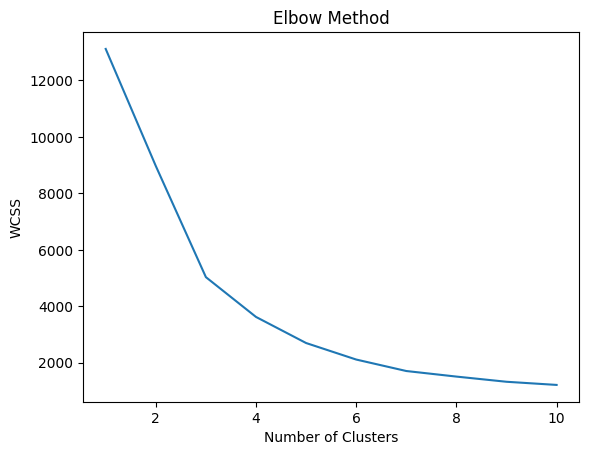

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'TotalSpend']])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Assuming optimal_clusters is determined from the Elbow plot
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customer_data['Cluster']

CustomerID
12346.0    0
12347.0    1
12348.0    1
12349.0    0
12350.0    0
          ..
18280.0    0
18281.0    0
18282.0    0
18283.0    1
18287.0    0
Name: Cluster, Length: 4372, dtype: int32

In [ ]:
customer_data['Cluster'].count()

4372

In [ ]:
customer_data['Cluster'].value_counts()

0    2571
1    1792
2       5
3       4
Name: Cluster, dtype: int64

In [ ]:
# Analyzing cluster characteristics
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalSpend': 'mean'
})
cluster_analysis

,Recency,Frequency,TotalSpend
Cluster,,,
0,32.419681,37.385842,591.700697
1,277.258371,157.358817,3102.219666
2,350.600000,1013.400000,192103.854000
3,303.000000,5914.000000,64776.602500


#Analysis of the Groups

Based on the output displayed, we can see that the KMeans clustering algorithm has divided the customer data into four distinct segments or clusters based on Recency (how recently they made a purchase), Frequency (how often they make purchases), and TotalSpend (how much they spend). Here’s an analysis of each cluster:

Cluster 0:

Recency: 32.42 (average days since last purchase)
Frequency: 37.39 (average number of transactions)
TotalSpend: 591.70 (average total spend)
Insights: Customers in this cluster are recent shoppers who make moderate to a low number of transactions and have the lowest average spend. This could indicate new or occasional shoppers who are testing or sporadically purchasing from the store.

Marketing Strategy: To encourage repeat visits, consider implementing a first-time buyer or a loyalty program, providing welcome discounts, or recommending popular products to increase their purchase frequency and amount.

#Cluster 1:

Recency: 277.26 (average days since last purchase)
Frequency: 157.36 (average number of transactions)
TotalSpend: 3102.22 (average total spend)
Insights: These customers haven’t shopped recently but, on average, have made a considerable number of transactions with a moderate total spend in the past. They could be former regular customers who have churned or seasonal shoppers.

Marketing Strategy: Re-engagement campaigns are crucial here. Reach out with win-back offers, reminders of new stock or products, and perhaps a loyalty reward that might incentivize them to return.

#Cluster 2:
Recency: 350.60 (average days since last purchase)
Frequency: 1013.40 (average number of transactions)
TotalSpend: 192103.85 (average total spend)
Insights: This is an interesting cluster, showing customers with the highest average frequency and total spend but also the longest time since their last purchase. These might be bulk buyers or customers who made significant one-off purchases but have not returned, possibly due to being project-based shoppers.

Marketing Strategy: It’s critical to investigate why they haven’t returned. Surveys or personalized outreach might uncover reasons for their departure. Custom bulk offers or incentives on new product lines related to their historical purchases might rekindle the relationship.

#Cluster 3:

Recency: 303.00 (average days since last purchase)
Frequency: 5914.00 (average number of transactions)
TotalSpend: 64776.60 (average total spend)
Insights: These customers have been away for some time, almost as long as cluster 2, but have an extremely high frequency of purchases and a very high total spend. They may represent institutional buyers or resellers who make purchases in large volumes.

Marketing Strategy: Given their value, it’s important to prioritize re-engagement. Consider offering volume discounts, partnership deals, or exclusive access to products to draw them back in. Additionally, personal account management or service could be provided to foster a stronger relationship.

#Overall Strategy:

Each cluster presents a unique opportunity and challenge, and the insights should be used to tailor marketing strategies accordingly. The overarching goal is to move customers from clusters with higher recency (less recent purchases) to lower recency and to increase frequency and total spend across all segments. Personalization, targeted offers, and understanding the needs and behaviors of each segment will be key in maximizing customer value and business growth.